### Unit 2/ Lesson 1/ Project 8 Thinkful

#### Import Data and Clean it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv('countries of the world.csv')
df_Restore = df.copy(deep=True)
df.shape

(227, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [4]:
#clean up column names for a more useable format
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('/', '').str.replace('%', 'perc').str.replace('.','')
df = df.rename(columns = {'gdp_$_per_capita': 'gdp_per_capita'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country                             227 non-null object
region                              227 non-null object
population                          227 non-null int64
area_sq_mi                          227 non-null int64
pop_density_per_sq_mi               227 non-null object
coastline_coastarea_ratio           227 non-null object
net_migration                       224 non-null object
infant_mortality_per_1000_births    224 non-null object
gdp_per_capita                      226 non-null float64
literacy_perc                       209 non-null object
phones_per_1000                     223 non-null object
arable_perc                         225 non-null object
crops_perc                          225 non-null object
other_perc                          225 non-null object
climate                             205 non-null object
birthrate                           224 non-null object


In [5]:
df['pop_density_per_sq_mi']=df.pop_density_per_sq_mi.str.strip().str.replace(',','.')
df['coastline_coastarea_ratio']=df.coastline_coastarea_ratio.str.strip().str.replace(',','.')
df['net_migration']=df.net_migration.str.strip().str.replace(',','.')
df['infant_mortality_per_1000_births']=df.infant_mortality_per_1000_births.str.strip().str.replace(',','.')
df['literacy_perc']=df.literacy_perc.str.strip().str.replace(',','.')
df['birthrate']=df.birthrate.str.strip().str.replace(',','.')
df['deathrate']=df.deathrate.str.strip().str.replace(',','.')

In [6]:
df['pop_density_per_sq_mi']= pd.to_numeric(df.pop_density_per_sq_mi)
df['net_migration']= pd.to_numeric(df.net_migration)
df['infant_mortality_per_1000_births']=pd.to_numeric(df.infant_mortality_per_1000_births)
df['coastline_coastarea_ratio']=pd.to_numeric(df.coastline_coastarea_ratio)
df['literacy_perc']=pd.to_numeric(df.literacy_perc)
df['birthrate']=pd.to_numeric(df.birthrate)
df['deathrate']=pd.to_numeric(df.deathrate)

In [7]:
df[df['gdp_per_capita'].isnull()]

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_per_capita,literacy_perc,phones_per_1000,arable_perc,crops_perc,other_perc,climate,birthrate,deathrate,agriculture,industry,service
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"


In [8]:
df.loc[df['gdp_per_capita'].isna(),'gdp_per_capita'] = 0

In [9]:
df['region']=df.region.str.strip()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country                             227 non-null object
region                              227 non-null object
population                          227 non-null int64
area_sq_mi                          227 non-null int64
pop_density_per_sq_mi               227 non-null float64
coastline_coastarea_ratio           227 non-null float64
net_migration                       224 non-null float64
infant_mortality_per_1000_births    224 non-null float64
gdp_per_capita                      227 non-null float64
literacy_perc                       209 non-null float64
phones_per_1000                     223 non-null object
arable_perc                         225 non-null object
crops_perc                          225 non-null object
other_perc                          225 non-null object
climate                             205 non-null object
birthrate                           224 non-null fl

In [11]:
df.head()

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_per_capita,literacy_perc,phones_per_1000,arable_perc,crops_perc,other_perc,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,"3,2","12,13","0,22","87,65",1,46.60,20.34,"0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,"71,2","21,09","4,42","74,49",3,15.11,5.22,"0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,"78,1","3,22","0,25","96,53",1,17.14,4.61,"0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,"259,5",10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,"497,2","2,22",0,"97,78",3,8.71,6.25,NaN,NaN,NaN


In [12]:
df.tail()

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_per_capita,literacy_perc,phones_per_1000,arable_perc,crops_perc,other_perc,climate,birthrate,deathrate,agriculture,industry,service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,"145,2","16,9","18,97","64,13",3,31.67,3.92,"0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,0.0,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,"37,2","2,78","0,24","96,98",1,42.89,8.30,"0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,"8,2","7,08","0,03","92,9",2,41.00,19.93,"0,22","0,29","0,489"
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,"26,8","8,32","0,34","91,34",2,28.01,21.84,"0,179","0,243","0,579"


In [13]:
df.groupby('region').describe()

area_sq_mi                                        \
                          count          mean           std       min   
region                                                                  
ASIA (EX. NEAR EAST)       28.0  8.248826e+05  1.876839e+06      28.0   
BALTICS                     3.0  5.833833e+04  1.135972e+04   45226.0   
C.W. OF IND. STATES        12.0  1.841737e+06  4.853888e+06   29800.0   
EASTERN EUROPE             12.0  9.601850e+04  8.974857e+04   20273.0   
LATIN AMER. & CARIB        45.0  4.565352e+05  1.353502e+06     102.0   
NEAR EAST                  16.0  2.722241e+05  5.055165e+05     360.0   
NORTHERN AFRICA             6.0  1.003148e+06  8.978486e+05  163610.0   
NORTHERN AMERICA            5.0  4.356494e+06  5.056051e+06      53.0   
OCEANIA                    21.0  4.057053e+05  1.672115e+06      21.0   
SUB-SAHARAN AFRICA         51.0  4.772825e+05  5.801928e+05     374.0   
WESTERN EUROPE             28.0  1.325171e+05  1.739409e+05       2.0   

                                                                  birthrate  \
                            25%        50%        75%         max     count   
region                                                                        
ASIA (EX. NEAR EAST)   44245.00   208920.0   655250.0   9596960.0      28.0   
BALTICS                54907.50    64589.0    64894.5     65200.0       3.0   
C.W. OF IND. STATES    82375.00   203050.0   517000.0  17075200.0      12.0   
EASTERN EUROPE         43820.75    67704.0    97500.0    312685.0      11.0   
LATIN AMER. & CARIB      616.00    22966.0   176220.0   8511965.0      45.0   
NEAR EAST              10112.50    51825.0   268613.0   1960582.0      16.0   
NORTHERN AFRICA       311137.50   724000.0  1570017.5   2381740.0       5.0   
NORTHERN AMERICA         242.00  2166086.0  9631420.0   9984670.0       5.0   
OCEANIA                  458.00      811.0    18270.0   7686850.0      20.0   
SUB-SAHARAN AFRICA     27940.50   245857.0   777102.0   2505810.0      51.0   
WESTERN EUROPE           430.00    42310.0   258922.5    547030.0      28.0   

                                     ...      pop_density_per_sq_mi           \
                           mean      ...                        75%      max   
region                               ...                                       
ASIA (EX. NEAR EAST)  21.157857      ...                    377.050  16183.0   
BALTICS                9.343333      ...                     45.100     55.0   
C.W. OF IND. STATES   17.855833      ...                     81.025    132.0   
EASTERN EUROPE        10.370909      ...                    114.375    129.8   
LATIN AMER. & CARIB   19.081111      ...                    231.000    649.5   
NEAR EAST             25.031875      ...                    322.475   3968.8   
NORTHERN AFRICA       20.814000      ...                     71.350     78.8   
NORTHERN AMERICA      13.154000      ...                     31.000   1241.0   
OCEANIA               22.108000      ...                    153.900    632.7   
SUB-SAHARAN AFRICA    36.043922      ...                    101.050    608.3   
WESTERN EUROPE        10.553571      ...                    354.275  16271.5   

                     population                                         \
                          count          mean           std        min   
region                                                                   
ASIA (EX. NEAR EAST)       28.0  1.317137e+08  3.102610e+08   359008.0   
BALTICS                     3.0  2.394991e+06  1.135572e+06  1324333.0   
C.W. OF IND. STATES        12.0  2.334013e+07  3.973450e+07  2976372.0   
EASTERN EUROPE             12.0  9.992893e+06  1.054246e+07  2010347.0   
LATIN AMER. & CARIB        45.0  1.248499e+07  3.235397e+07     9439.0   
NEAR EAST                  16.0  1.219177e+07  1.819645e+07   698585.0   
NORTHERN AFRICA             6.0  2.690119e+07  2.901349e+07   273008.0   
NORTHERN AMERICA            5.

In [14]:
df.groupby('country').describe().head(30)

area_sq_mi                                       \
                           count       mean std        min        25%   
country                                                                 
Afghanistan                  1.0   647500.0 NaN   647500.0   647500.0   
Albania                      1.0    28748.0 NaN    28748.0    28748.0   
Algeria                      1.0  2381740.0 NaN  2381740.0  2381740.0   
American Samoa               1.0      199.0 NaN      199.0      199.0   
Andorra                      1.0      468.0 NaN      468.0      468.0   
Angola                       1.0  1246700.0 NaN  1246700.0  1246700.0   
Anguilla                     1.0      102.0 NaN      102.0      102.0   
Antigua & Barbuda            1.0      443.0 NaN      443.0      443.0   
Argentina                    1.0  2766890.0 NaN  2766890.0  2766890.0   
Armenia                      1.0    29800.0 NaN    29800.0    29800.0   
Aruba                        1.0      193.0 NaN      193.0      193.0   
Australia                    1.0  7686850.0 NaN  7686850.0  7686850.0   
Austria                      1.0    83870.0 NaN    83870.0    83870.0   
Azerbaijan                   1.0    86600.0 NaN    86600.0    86600.0   
Bahamas, The                 1.0    13940.0 NaN    13940.0    13940.0   
Bahrain                      1.0      665.0 NaN      665.0      665.0   
Bangladesh                   1.0   144000.0 NaN   144000.0   144000.0   
Barbados                     1.0      431.0 NaN      431.0      431.0   
Belarus                      1.0   207600.0 NaN   207600.0   207600.0   
Belgium                      1.0    30528.0 NaN    30528.0    30528.0   
Belize                       1.0    22966.0 NaN    22966.0    22966.0   
Benin                        1.0   112620.0 NaN   112620.0   112620.0   
Bermuda                      1.0       53.0 NaN       53.0       53.0   
Bhutan                       1.0    47000.0 NaN    47000.0    47000.0   
Bolivia                      1.0  1098580.0 NaN  1098580.0  1098580.0   
Bosnia & Herzegovina         1.0    51129.0 NaN    51129.0    51129.0   
Botswana                     1.0   600370.0 NaN   600370.0   600370.0   
Brazil                       1.0  8511965.0 NaN  8511965.0  8511965.0   
British Virgin Is.           1.0      153.0 NaN      153.0      153.0   
Brunei                       1.0     5770.0 NaN     5770.0     5770.0   

                                                       birthrate         \
                             50%        75%        max     count   mean   
country                                                                   
Afghanistan             647500.0   647500.0   647500.0       1.0  46.60   
Albania                  28748.0    28748.0    28748.0       1.0  15.11   
Algeria                2381740.0  2381740.0  2381740.0       1.0  17.14   
American Samoa             199.0      199.0      199.0       1.0  22.46   
Andorra                    468.0      468.0      468.0       1.0   8.71   
Angola                 1246700.0  1246700.0  1246700.0       1.0  45.11   
Anguilla                   102.0      102.0      102.0       1.0  14.17   
Antigua & Barbuda          443.0      443.0      443.0       1.0  16.93   
Argentina              2766890.0  2766890.0  2766890.0       1.0  16.73   
Armenia                  29800.0    29800.0    29800.0       1.0  12.07   
Aruba                      193.0      193.0      193.0       1.0  11.03   
Australia              7686850.0  7686850.0  7686850.0       1.0  12.14   
Austria                  83870.0    83870.0    83870.0       1.0   8.74   
Azerbaijan               86600.0    86600.0    86600.0       1.0  20.74   
Bahamas, The             13940.0    13940.0    13940.0       1.0  17.57   
Bahrain                    665.0      665.0      665.0       1.0  17.80   
Bangladesh              144000.0   144000.0   144000.0       1.0  29.80   
Barbados                   431.0      431.0      431.0       1.0  12.71   
Belarus                 207600.0   20

In [15]:
df.groupby(['population','country']).describe().head(30)

area_sq_mi                            \
                                      count       mean std        min   
population country                                                      
7026       St Pierre & Miquelon         1.0      242.0 NaN      242.0   
7502       Saint Helena                 1.0      413.0 NaN      413.0   
9439       Montserrat                   1.0      102.0 NaN      102.0   
11810      Tuvalu                       1.0       26.0 NaN       26.0   
13287      Nauru                        1.0       21.0 NaN       21.0   
13477      Anguilla                     1.0      102.0 NaN      102.0   
16025      Wallis and Futuna            1.0      274.0 NaN      274.0   
20579      Palau                        1.0      458.0 NaN      458.0   
21152      Turks & Caicos Is            1.0      430.0 NaN      430.0   
21388      Cook Islands                 1.0      240.0 NaN      240.0   
23098      British Virgin Is.           1.0      153.0 NaN      153.0   
27928      Gibraltar                    1.0        7.0 NaN        7.0   
29251      San Marino                   1.0       61.0 NaN       61.0   
32543      Monaco                       1.0        2.0 NaN        2.0   
33987      Liechtenstein                1.0      160.0 NaN      160.0   
39129      Saint Kitts & Nevis          1.0      261.0 NaN      261.0   
45436      Cayman Islands               1.0      262.0 NaN      262.0   
47246      Faroe Islands                1.0     1399.0 NaN     1399.0   
56361      Greenland                    1.0  2166086.0 NaN  2166086.0   
57794      American Samoa               1.0      199.0 NaN      199.0   
60422      Marshall Islands             1.0    11854.0 NaN    11854.0   
65409      Guernsey                     1.0       78.0 NaN       78.0   
65773      Bermuda                      1.0       53.0 NaN       53.0   
68910      Dominica                     1.0      754.0 NaN      754.0   
69108      Antigua & Barbuda            1.0      443.0 NaN      443.0   
71201      Andorra                      1.0      468.0 NaN      468.0   
71891      Aruba                        1.0      193.0 NaN      193.0   
75441      Isle of Man                  1.0      572.0 NaN      572.0   
81541      Seychelles                   1.0      455.0 NaN      455.0   
82459      N. Mariana Islands           1.0      477.0 NaN      477.0   

                                                                              \
                                        25%        50%        75%        max   
population country                                                             
7026       St Pierre & Miquelon       242.0      242.0      242.0      242.0   
7502       Saint Helena               413.0      413.0      413.0      413.0   
9439       Montserrat                 102.0      102.0      102.0      102.0   
11810      Tuvalu                      26.0       26.0       26.0       26.0   
13287      Nauru                       21.0       21.0       21.0       21.0   
13477      Anguilla                   102.0      102.0      102.0      102.0   
16025      Wallis and Futuna          274.0      274.0      274.0      274.0   
20579      Palau                      458.0      458.0      458.0      458.0   
21152      Turks & Caicos Is          430.0      430.0      430.0      430.0   
21388      Cook Islands               240.0      240.0      240.0      240.0   
23098      British Virgin Is.         153.0      153.0      153.0      153.0   
27928      Gibraltar                    7.0        7.0        7.0        7.0   
29251      San Marino                  61.0       61.0       61.0       61.0   
32543      Monaco                       2.0        2.0        2.0        2.0   
33987      Liechtenstein              160.0      160.0      160.0      160.0   
39129      Saint Kitts & Nevis        261.0      261.0      261.0      261.0   
45436      Cayman Islands             262.0      262.0      262.0      262.0   
47246      Faroe Island

In [16]:
df.columns

Index(['country', 'region', 'population', 'area_sq_mi',
       'pop_density_per_sq_mi', 'coastline_coastarea_ratio', 'net_migration',
       'infant_mortality_per_1000_births', 'gdp_per_capita', 'literacy_perc',
       'phones_per_1000', 'arable_perc', 'crops_perc', 'other_perc', 'climate',
       'birthrate', 'deathrate', 'agriculture', 'industry', 'service'],
      dtype='object')

#### Select a dataset fro modeling

In [25]:
sns.set_style("white")

#Remove one null value from set by selecting gdp greater than 1
df_cntry = df.loc[(df['gdp_per_capita'] > 1),['country', 'region', 'net_migration','birthrate','deathrate', 'population', 'area_sq_mi', 'pop_density_per_sq_mi', 'gdp_per_capita']]
df_cntry

,country,region,net_migration,birthrate,deathrate,population,area_sq_mi,pop_density_per_sq_mi,gdp_per_capita
0,Afghanistan,ASIA (EX. NEAR EAST),23.06,46.60,20.34,31056997,647500,48.0,700.0
1,Albania,EASTERN EUROPE,-4.93,15.11,5.22,3581655,28748,124.6,4500.0
2,Algeria,NORTHERN AFRICA,-0.39,17.14,4.61,32930091,2381740,13.8,6000.0
3,American Samoa,OCEANIA,-20.71,22.46,3.27,57794,199,290.4,8000.0
4,Andorra,WESTERN EUROPE,6.60,8.71,6.25,71201,468,152.1,19000.0
5,Angola,SUB-SAHARAN AFRICA,0.00,45.11,24.20,12127071,1246700,9.7,1900.0
6,Anguilla,LATIN AMER. & CARIB,10.76,14.17,5.34,13477,102,132.1,8600.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,-6.15,16.93,5.37,69108,443,156.0,11000.0
8,Argentina,LATIN AMER. & CARIB,0.61,16.73,7.55,39921833,2766890,14.4,11200.0
9,Armenia,C.W. OF IND. STATES,-6.47,12.07,8.23,2976372,29800,99.9,3500.0


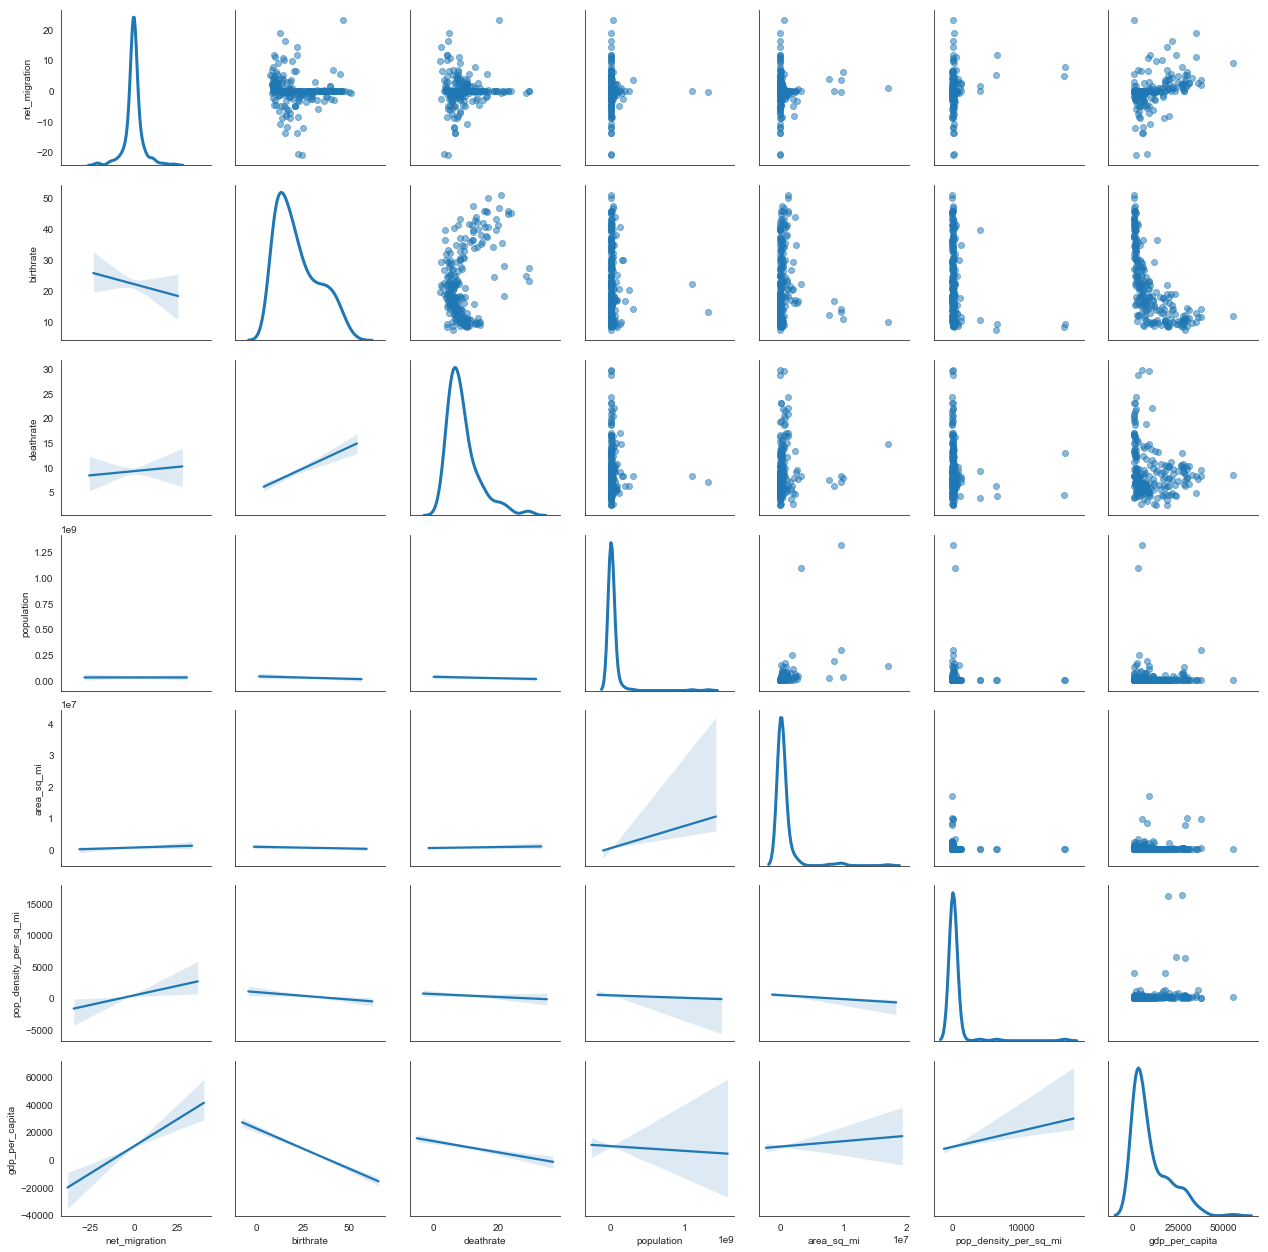

In [26]:
c = sns.PairGrid(df_cntry.dropna(), diag_sharey=False)

c.map_upper(plt.scatter, alpha=.5)

c.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

c.map_diag(sns.kdeplot, lw=3)
plt.show();



                       net_migration  birthrate  deathrate  population  \
net_migration               1.000000  -0.066537   0.033611    0.000011   
birthrate                  -0.066537   1.000000   0.395302   -0.045090   
deathrate                   0.033611   0.395302   1.000000   -0.028367   
population                  0.000011  -0.045090  -0.028367    1.000000   
area_sq_mi                  0.047470  -0.066423   0.040079    0.469883   
pop_density_per_sq_mi       0.178038  -0.159192  -0.070045   -0.028442   
gdp_per_capita              0.382461  -0.650137  -0.201661   -0.039324   

                       area_sq_mi  pop_density_per_sq_mi  gdp_per_capita  
net_migration            0.047470               0.178038        0.382461  
birthrate               -0.066423              -0.159192       -0.650137  
deathrate                0.040079              -0.070045       -0.201661  
population               0.469883              -0.028442       -0.039324  
area_sq_mi               1.00000

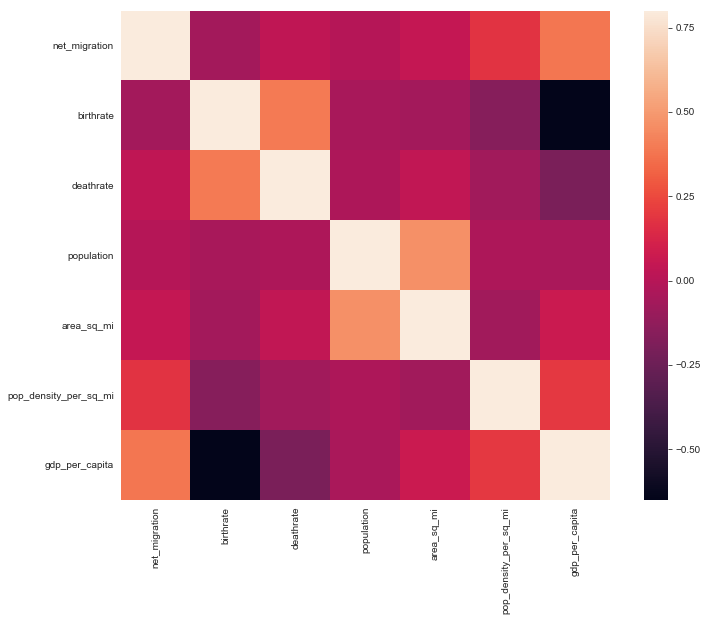

In [27]:
corrmat = df_cntry.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [28]:
print(df.region.unique())

['ASIA (EX. NEAR EAST)' 'EASTERN EUROPE' 'NORTHERN AFRICA' 'OCEANIA'
 'WESTERN EUROPE' 'SUB-SAHARAN AFRICA' 'LATIN AMER. & CARIB'
 'C.W. OF IND. STATES' 'NEAR EAST' 'NORTHERN AMERICA' 'BALTICS']


In [43]:
#Region is a great categorical feature
features = pd.get_dummies(df['region'])
features

,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0


In [30]:
features['pop_over_100k'] = np.where(df['population']>=100000, 1, 0)


print(df['population'].groupby(features['pop_over_100k']).describe())

               count          mean           std       min         25%  \
pop_over_100k                                                            
0               32.0  4.460625e+04  2.714037e+04    7026.0    21008.75   
1              195.0  3.344932e+07  1.266206e+08  105432.0  1825955.50   

                     50%         75%           max  
pop_over_100k                                       
0                42282.5     68959.5  9.108400e+04  
1              6940432.0  22356562.0  1.313974e+09  


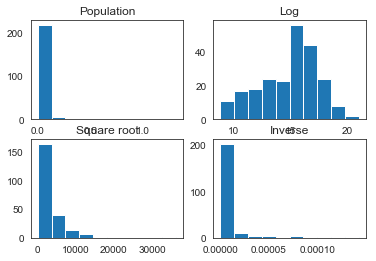

In [32]:
g = plt.figure()

g.add_subplot(221)
plt.hist(df['population'].dropna())
plt.title('Population')

g.add_subplot(222)
plt.hist(np.log(df['population'].dropna()))
plt.title('Log')

g.add_subplot(223)
plt.hist(np.sqrt(df['population'].dropna()))
plt.title('Square root')

ax3=g.add_subplot(224)
plt.hist(1/df['population'].dropna())
plt.title('Inverse')
plt.show()

#log gives us something here so I made a feature
features['log_population'] = np.log(df['population'])

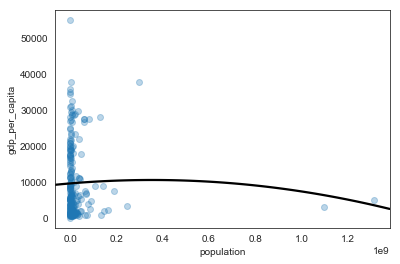

In [36]:
sns.regplot(
    df['population'],
    y=df['gdp_per_capita'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['population_squared'] = df['population'] * df['population']

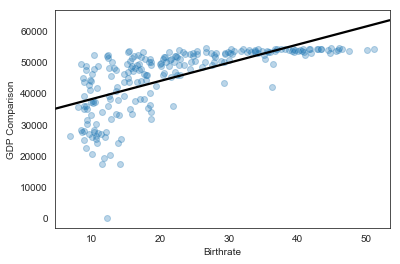

In [39]:
features['gdp_comp'] = max(df['gdp_per_capita']) - df['gdp_per_capita']

sns.regplot(
    df['birthrate'],
    features['gdp_comp'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Birthrate')
plt.ylabel('GDP Comparison')
plt.show()

In [40]:
features['Migration']= max(df['net_migration'])-df['net_migration']

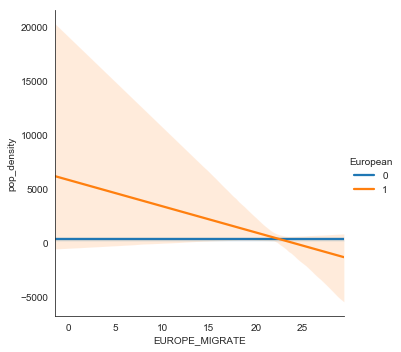

In [42]:
features['European'] = np.where((df['region'].isin(['WESTERN EUROPE', 'EASTERN EUROPE'])), 1, 0)

# Create the interaction.
features['EUROPE_MIGRATE'] = features['Migration'] * features['European']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['pop_density'] = df['pop_density_per_sq_mi']
sns.lmplot(
    x='EUROPE_MIGRATE',
    y='pop_density',
    hue='European',
    data=features,
    scatter=False
)
plt.show()